# Process pgbench summaries

This notebook is used to process the summary of a series of PgBench runs. 
It generates graphs that show latencies and througput for different number of clients for different connection poolers.

In [1]:
import pandas as pd

These are the directories where we expect to find `summary.csv` and `progress.csv`. You may want to adjust these.

In [2]:
dirs = [
        "001-results-varying-clients/baseline-1706494468",
        "001-results-varying-clients/Disconnect/baseline-1706499426",
        "001-results-varying-clients/pgbouncer-1706510776",
        "001-results-varying-clients/pgcat-1706517571",
        "001-results-varying-clients/supavisor-1706525608",
       ]

The following are constants. The files we use are the ones generated by `parse_pgbench_output.py`. You should not need to change these.

In [3]:
summary_fname = "summary.csv"
progress_fname = "progress.csv"

colors = ["#412e93", "#f9457a", "#da38ca", "#44d3ec", "#e9fc87",
            "#1f78b4",  # Blue
            "#33a02c",  # Green
            "#e31a1c",  # Red
            "#ff7f00",  # Orange
            "#6a3d9a",  # Purple
            "#a6cee3",  # Light Blue
            "#b2df8a",  # Light Green
            "#fb9a99",  # Light Red
            "#fdbf6f",  # Light Orange
            "#cab2d6"   # Light Purple
        ]

In [4]:
dfs_summary = []
dfs_progress = []

for d in dirs:
        df = pd.read_csv(f"{d}/{summary_fname}")
        dfs_summary.append(df)
        
for d in dirs:
        df = pd.read_csv(f"{d}/{progress_fname}")
        dfs_progress.append(df)

## Average Latencies for small connection count

For a list of experiments, generate bar graphs showing the average latency.

In [5]:
latency_df = pd.DataFrame({
    "num_clients": [10, 25, 50, 75, 100],
    "baseline-no-reconnect": dfs_summary[0].set_index("num_clients").sort_index()['latency_avg'],
    "baseline-reconnect": dfs_summary[1].set_index("num_clients").sort_index()['latency_avg'],
    "pgbouncer": dfs_summary[2].set_index("num_clients").sort_index()['latency_avg'][:5],
    "pgcat": dfs_summary[3].set_index("num_clients").sort_index()['latency_avg'][:5],
    "supavisor": dfs_summary[4].set_index("num_clients").sort_index()['latency_avg'][:5],
})

Text(0.5, 1.0, 'Average Latency')

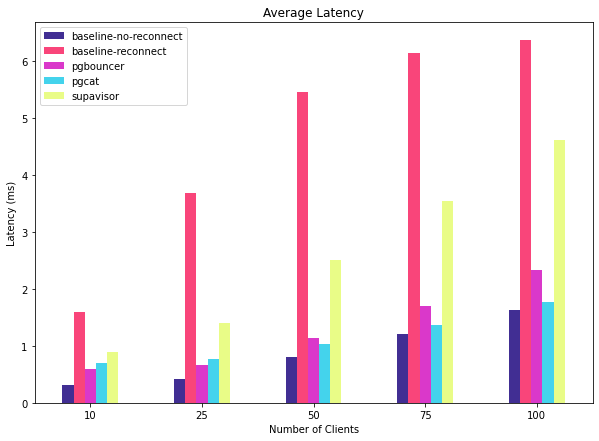

In [6]:
ax = latency_df.plot.bar(x="num_clients", color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Latency (ms)")
ax.set_xlabel("Number of Clients")
ax.set_title(f"Average Latency")

In [7]:
latency_df

,num_clients,baseline-no-reconnect,baseline-reconnect,pgbouncer,pgcat,supavisor
num_clients,,,,,,
10,10,0.319,1.588,0.592,0.703,0.892
25,25,0.416,3.675,0.658,0.774,1.393
50,50,0.797,5.444,1.134,1.024,2.498
75,75,1.202,6.140,1.702,1.373,3.544
100,100,1.622,6.356,2.332,1.771,4.606


## Average Throughput for small connection count

For a list of experiments, generate bar graphs showing the average throughput.

In [8]:
throughput_df = pd.DataFrame({
    "num_clients": [10, 25, 50, 75, 100],
    "baseline-no-reconnect": dfs_summary[0].set_index("num_clients").sort_index()['tps'],
    "baseline-reconnect": dfs_summary[1].set_index("num_clients").sort_index()['tps'],
    "pgbouncer": dfs_summary[2].set_index("num_clients").sort_index()['tps'][:5],
    "pgcat": dfs_summary[3].set_index("num_clients").sort_index()['tps'][:5],
    "supavisor": dfs_summary[4].set_index("num_clients").sort_index()['tps'][:5],
})

Text(0.5, 1.0, 'Average Throughput')

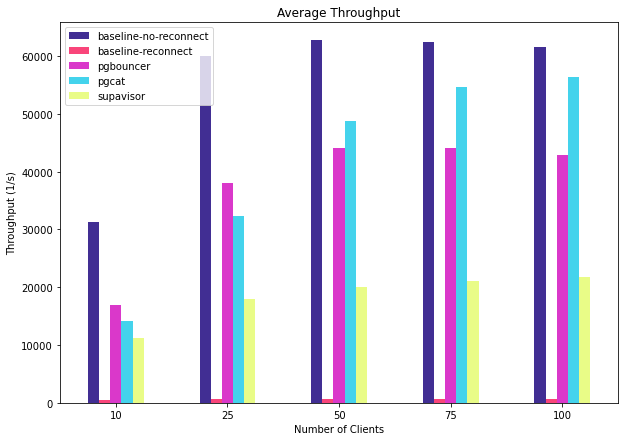

In [9]:
ax = throughput_df.plot.bar(x="num_clients", color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Throughput (1/s)")
ax.set_xlabel("Number of Clients")
ax.set_title(f"Average Throughput")

## Average Latencies for large connection count

For a list of experiments, generate bar graphs showing the average latency.

In [10]:
latency_df = pd.DataFrame({
    "num_clients": [10, 25, 50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500],
    "pgbouncer": dfs_summary[2].set_index("num_clients").sort_index()['latency_avg'],
    "pgcat": dfs_summary[3].set_index("num_clients").sort_index()['latency_avg'],
    "supavisor": dfs_summary[4].set_index("num_clients").sort_index()['latency_avg'],
})

Text(0.5, 1.0, 'Average Latency')

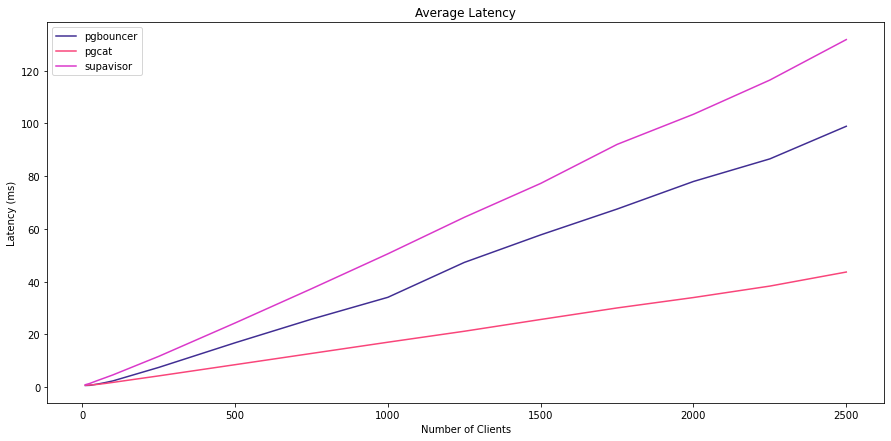

In [11]:
ax = latency_df.plot.line(x="num_clients", color=colors, figsize=(15,7), rot=0)
ax.set_ylabel("Latency (ms)")
ax.set_xlabel("Number of Clients")
ax.set_title(f"Average Latency")

In [12]:
latency_df

,num_clients,pgbouncer,pgcat,supavisor
num_clients,,,,
10,10,0.592,0.703,0.892
25,25,0.658,0.774,1.393
50,50,1.134,1.024,2.498
75,75,1.702,1.373,3.544
100,100,2.332,1.771,4.606
250,250,7.449,4.239,11.640
500,500,16.794,8.487,24.306
750,750,25.742,12.749,37.286
1000,1000,34.042,17.011,50.538


## Average Throughput for large connection count

For a list of experiments, generate bar graphs showing the average throughput.

In [13]:
throughput_df = pd.DataFrame({
    "num_clients": [10, 25, 50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500],
    "pgbouncer": dfs_summary[2].set_index("num_clients").sort_index()['tps'],
    "pgcat": dfs_summary[3].set_index("num_clients").sort_index()['tps'],
    "supavisor": dfs_summary[4].set_index("num_clients").sort_index()['tps'],
})

In [14]:
throughput_df

,num_clients,pgbouncer,pgcat,supavisor
num_clients,,,,
10,10,16871.483970,14210.215896,11201.886445
25,25,37991.110774,32294.448516,17943.862286
50,50,44096.213929,48812.879767,20010.417410
75,75,44051.964603,54610.283035,21158.430655
100,100,42880.296076,56462.798007,21708.792110
250,250,33557.028448,58965.263334,21476.567594
500,500,29769.956800,58903.931537,20569.085807
750,750,29132.207740,58822.571357,20112.196186
1000,1000,29371.639006,58778.210117,19783.542402


Text(0.5, 1.0, 'Average Throughput')

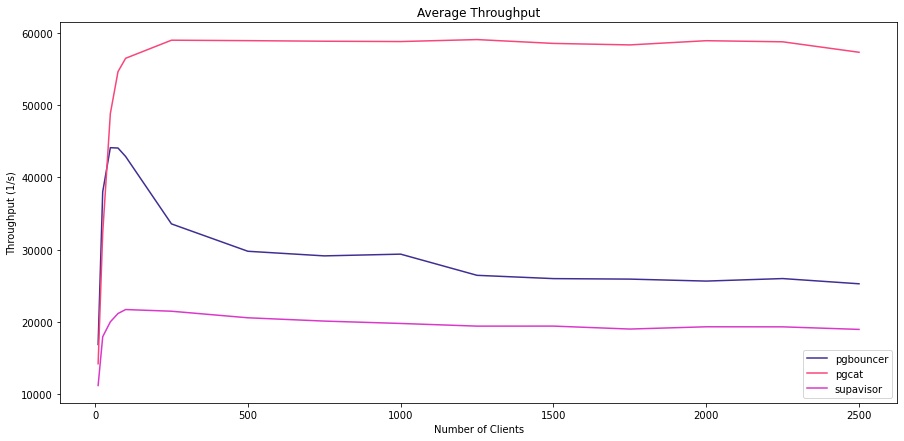

In [15]:
ax = throughput_df.plot.line(x="num_clients", color=colors, figsize=(15,7), rot=0)
ax.set_ylabel("Throughput (1/s)")
ax.set_xlabel("Number of Clients")
ax.set_title(f"Average Throughput")

## Throughput during experiment execution

Take the `progress.csv` file and generate graphs showing the behaviour throughout the experiment.

Text(0.5, 1.0, 'Throughput')

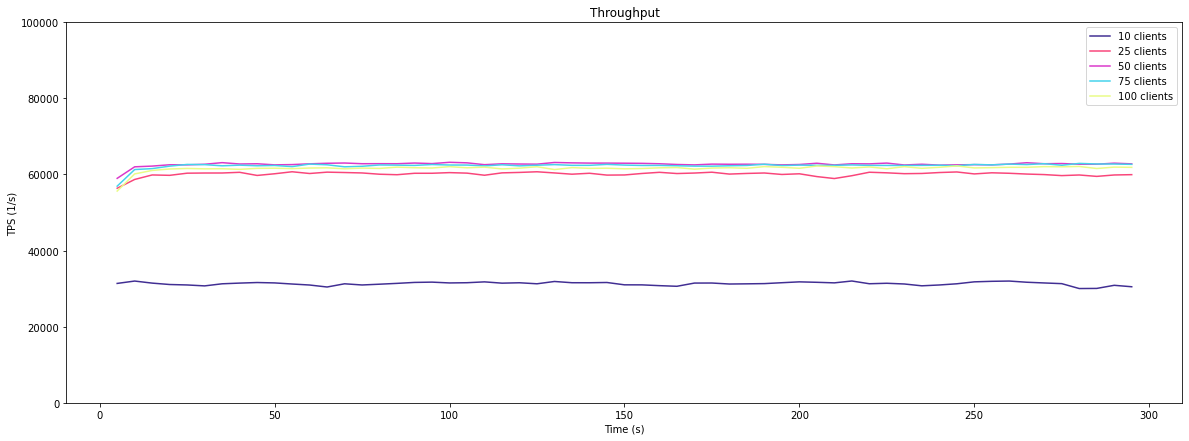

In [16]:
df = dfs_progress[0]
ax = None

for i, num_clients in enumerate([10, 25, 50, 75, 100]):
    ax = df[df['num_clients'] == num_clients].set_index("progress").sort_index().plot(ax = ax, y="tps", ylim=(0,100000), color=colors[i%len(colors)], figsize=(20,7), rot=0, label=f"{num_clients} clients")

ax.set_ylabel("TPS (1/s)")
ax.set_xlabel("Time (s)")
ax.set_title(f"Throughput")